In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from uuid import uuid4


In [30]:

# Set random seed for reproducibility
import numpy as np
np.random.seed(42)

# Load the CFPB complaint dataset
# Assuming dataset is available as 'Consumer_Complaints.csv' in the data directory
df = pd.read_csv('../data/Complaints.csv')

# Initial EDA
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())


C:\Users\Belete\AppData\Local\Temp\ipykernel_2420\3072343158.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Complaints.csv')


Dataset Shape: (1048575, 18)

Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

Missing Values:
 Date received                         0
Product                               6
Sub-product                        1026
Issue                                 5
Sub-issue                         20647
Consumer complaint narrative     889552
Company public response          749368
Company                               7
State                              1998
ZIP code                             21
Tags                            1019236
Consumer consent provided?       568603
Submitted via                         7
Date sent to company                  9
Company response to consumer          9
Timely response? 

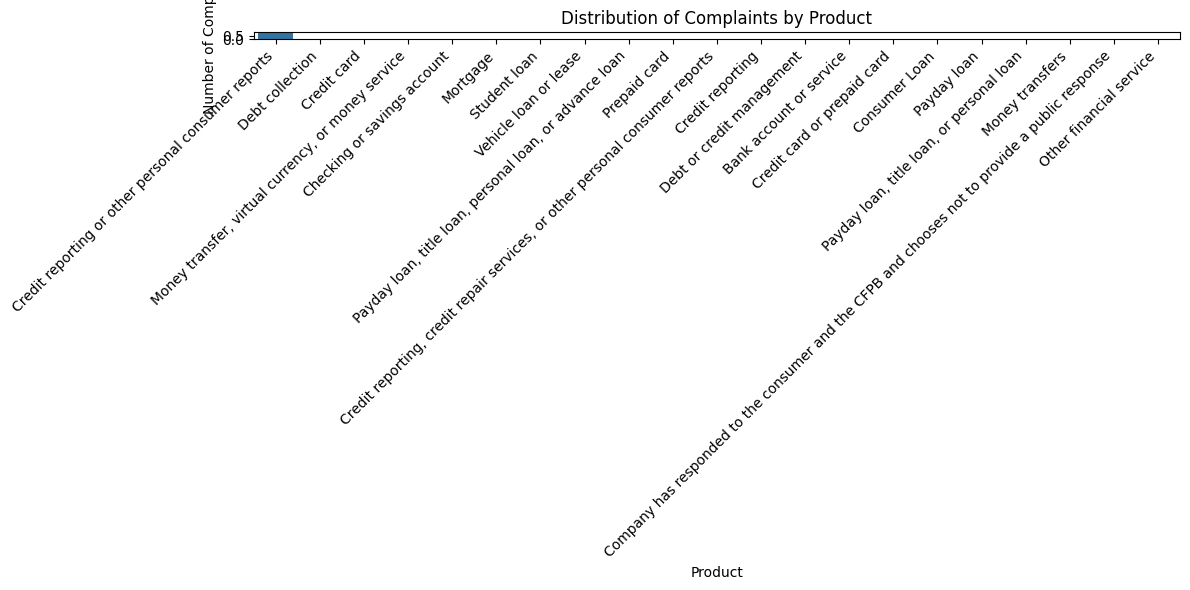

In [31]:

# Analyze distribution of complaints across Products
product_counts = df['Product'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.tight_layout()
# plt.savefig('product_distribution.png')
plt.show()


C:\Users\Belete\AppData\Local\Temp\ipykernel_2420\2482876211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')


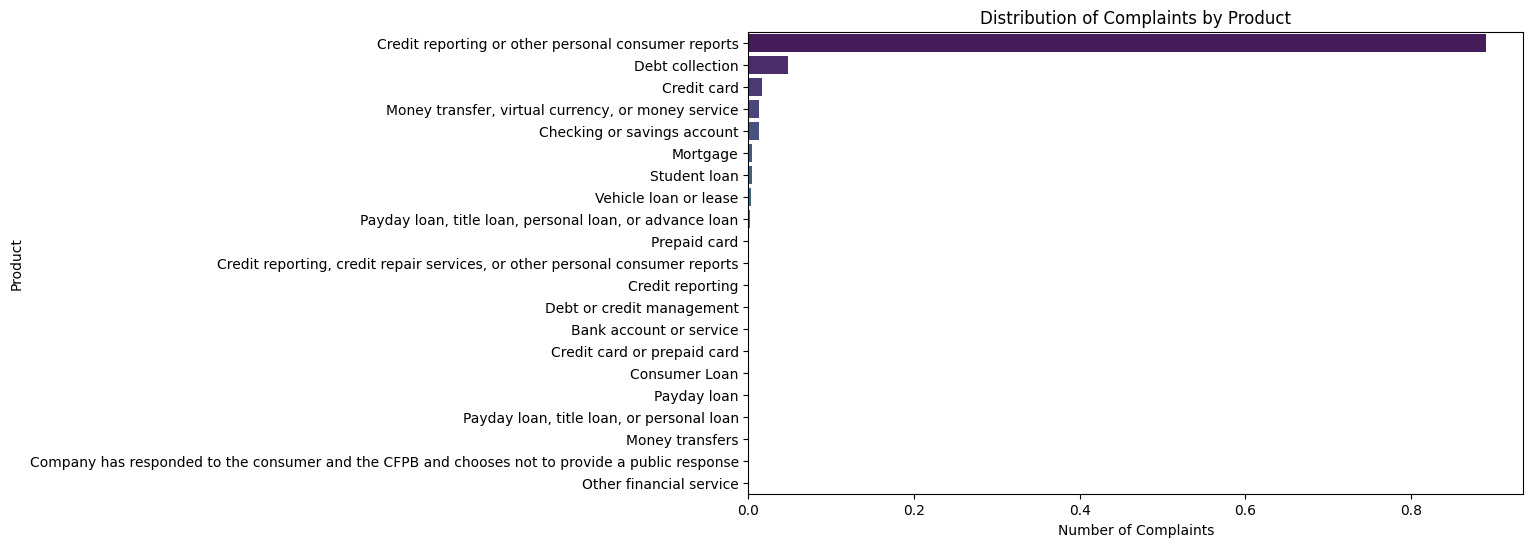

In [32]:

plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()

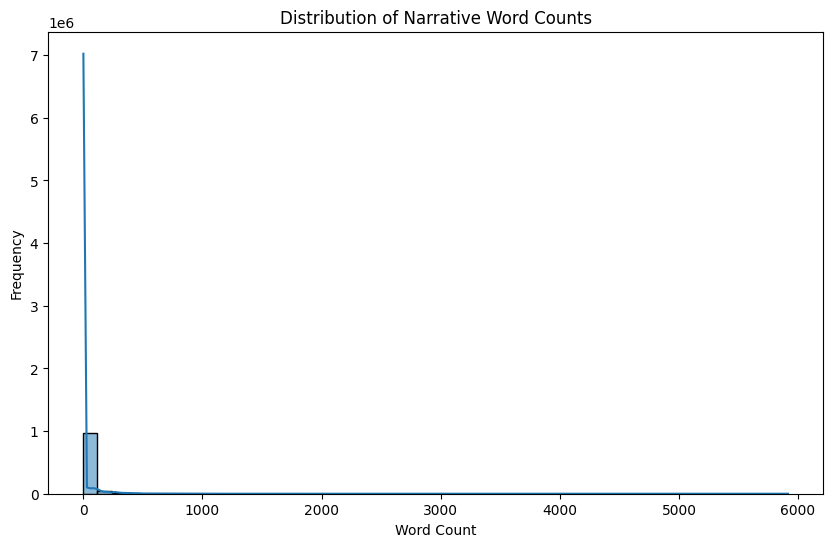

In [33]:

# Calculate word count for Consumer complaint narrative
df['narrative_length'] = df['Consumer complaint narrative'].apply(
    lambda x: len(str(x).split()) if pd.notnull(x) else 0
)

# Visualize narrative length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
# plt.savefig('narrative_length_distribution.png')
plt.show()


In [34]:

# Identify complaints with and without narratives
narrative_counts = df['Consumer complaint narrative'].notnull().value_counts()
print("\nComplaints with Narratives:", narrative_counts[True])
print("Complaints without Narratives:", narrative_counts[False])



Complaints with Narratives: 159023
Complaints without Narratives: 889552


In [35]:

# Filter dataset for specified products
target_products = ['Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)', 
                  'Savings account', 'Money transfers']
filtered_df = df[df['Product'].isin(target_products)]


In [36]:
filtered_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
334,6/20/2025,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",TX,75104,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14196294.0,0
595,6/20/2025,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,CA,92553,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14196854.0,0
661,6/20/2025,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77346,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14196870.0,0
687,6/20/2025,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",TX,77346,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14196880.0,0
795,6/20/2025,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",LA,71108,NaN,NaN,Web,6/20/2025,In progress,Yes,NaN,14197003.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048416,12/5/2024,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",MO,63033,NaN,NaN,Web,12/5/2024,Closed with explanation,Yes,NaN,11043990.0,0
1048426,3/28/2025,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",VA,22307,NaN,Consent not provided,Web,3/28/2025,Closed with non-monetary relief,Yes,NaN,12716180.0,0
1048448,2/23/2024,Credit card,General-purpose credit card or charge card,Struggling to pay your bill,Credit card company won't work with you while ...,Contacted Capital One Credit Card services bef...,NaN,CAPITAL ONE FINANCIAL CORPORATION,TX,77373,NaN,Consent provided,Web,2/23/2024,Closed with explanation,Yes,NaN,8399984.0,125
1048503,3/5/2025,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,I am requesting your help to investigate such ...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60651,NaN,Consent provided,Web,3/5/2025,Closed with non-monetary relief,Yes,NaN,12336939.0,51


In [37]:

# Remove records with empty narratives
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notnull()]


In [38]:
filtered_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
12237,6/13/2025,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,6/13/2025,Closed with non-monetary relief,Yes,NaN,14069121.0,91
13280,6/12/2025,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,6/13/2025,Closed with monetary relief,Yes,NaN,14047085.0,156
13506,6/12/2025,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,6/12/2025,Closed with explanation,Yes,NaN,14040217.0,233
13955,6/9/2025,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,6/9/2025,Closed with monetary relief,Yes,NaN,13968411.0,454
14249,6/9/2025,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,6/9/2025,Closed with monetary relief,Yes,NaN,13965746.0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047596,3/26/2024,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,This is concerning my XXXX credit card I've sp...,Company has responded to the consumer and the ...,"Continental Finance Company, LLC",OH,436XX,NaN,Consent provided,Web,3/28/2024,Closed with explanation,Yes,NaN,8636424.0,203
1047635,3/14/2025,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"- My wallet was stolen in XX/XX/year>, and my ...",NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,321XX,NaN,Consent provided,Web,3/14/2025,Closed with non-monetary relief,Yes,NaN,12491468.0,46
1048351,3/19/2025,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"On XX/XX/XXXX, my husband and I booked what wa...",NaN,CAPITAL ONE FINANCIAL CORPORATION,NY,10701,NaN,Consent provided,Web,3/19/2025,Closed with explanation,Yes,NaN,12531106.0,476
1048448,2/23/2024,Credit card,General-purpose credit card or charge card,Struggling to pay your bill,Credit card company won't work with you while ...,Contacted Capital One Credit Card services bef...,NaN,CAPITAL ONE FINANCIAL CORPORATION,TX,77373,NaN,Consent provided,Web,2/23/2024,Closed with explanation,Yes,NaN,8399984.0,125


In [43]:

# Text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and boilerplate phrases
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove common boilerplate phrases
    boilerplate_phrases = [
        r'i am writing to file a complaint',
        r'please investigate',
        r'this is regarding',
        r'please address this issue',
        r'consumer complaint',
        r'i would like to report'
    ]
    for phrase in boilerplate_phrases:
        text = re.sub(phrase, '', text, flags=re.IGNORECASE)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply text cleaning
filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)




C:\Users\Belete\AppData\Local\Temp\ipykernel_2420\3626352978.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [44]:

# Save cleaned and filtered dataset
filtered_df.to_csv('../data/filtered_complaints.csv', index=False)


In [45]:
filtered_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length,cleaned_narrative
12237,6/13/2025,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,6/13/2025,Closed with non-monetary relief,Yes,NaN,14069121.0,91,a xxxx xxxx card was opened under my name by a...
13280,6/12/2025,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,6/13/2025,Closed with monetary relief,Yes,NaN,14047085.0,156,dear cfpb i have a secured credit card with ci...
13506,6/12/2025,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,6/12/2025,Closed with explanation,Yes,NaN,14040217.0,233,i have a citi rewards cards the credit balance...
13955,6/9/2025,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,6/9/2025,Closed with monetary relief,Yes,NaN,13968411.0,454,bi am writing to dispute the following charges...
14249,6/9/2025,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,6/9/2025,Closed with monetary relief,Yes,NaN,13965746.0,170,although the account had been deemed closed i ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047596,3/26/2024,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,This is concerning my XXXX credit card I've sp...,Company has responded to the consumer and the ...,"Continental Finance Company, LLC",OH,436XX,NaN,Consent provided,Web,3/28/2024,Closed with explanation,Yes,NaN,8636424.0,203,this is concerning my xxxx credit card ive spo...
1047635,3/14/2025,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"- My wallet was stolen in XX/XX/year>, and my ...",NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,321XX,NaN,Consent provided,Web,3/14/2025,Closed with non-monetary relief,Yes,NaN,12491468.0,46,my wallet was stolen in xxxxyear and my credit...
1048351,3/19/2025,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"On XX/XX/XXXX, my husband and I booked what wa...",NaN,CAPITAL ONE FINANCIAL CORPORATION,NY,10701,NaN,Consent provided,Web,3/19/2025,Closed with explanation,Yes,NaN,12531106.0,476,on xxxxxxxx my husband and i booked what was a...
1048448,2/23/2024,Credit card,General-purpose credit card or charge card,Struggling to pay your bill,Credit card company won't work with you while ...,Contacted Capital One Credit Card services bef...,NaN,CAPITAL ONE FINANCIAL CORPORATION,TX,77373,NaN,Consent provided,Web,2/23/2024,Closed with explanation,Yes,NaN,8399984.0

In [42]:

# Summary statistics for filtered dataset
print("\nFiltered Dataset Shape:", filtered_df.shape)
print("\nFiltered Dataset Product Distribution:\n", filtered_df['Product'].value_counts())



Filtered Dataset Shape: (5018, 20)

Filtered Dataset Product Distribution:
 Product
Credit card        5016
Money transfers       2
Name: count, dtype: int64
